In [3]:
import json
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style - using a valid matplotlib style
plt.style.use('seaborn-v0_8')  # or just use 'default'
sns.set_context('notebook')

In [4]:
# Load the features and metadata
features_dir = Path("../data/sae_features")

# List all feature files
feature_files = list(features_dir.glob("sae_features_*.pt"))
print("Available feature files:")
for f in feature_files:
    print(f"  {f.name}")

# Load the most recent features
latest_features = sorted(feature_files)[-1]
features = torch.load(latest_features)

# Load corresponding metadata
metadata_path = latest_features.with_name(latest_features.stem + "_metadata.json")
with open(metadata_path) as f:
    metadata = json.load(f)

print(f"\nLoaded features shape: {features.shape}")
print(f"\nFeature statistics:")
print(f"  Sparsity: {metadata['sparsity']:.3f}")
print(f"  Mean activation: {metadata['mean_activation']:.3f}")

Available feature files:
  sae_features_20250123_143629.pt

Loaded features shape: torch.Size([10000, 6144])

Feature statistics:
  Sparsity: 0.992
  Mean activation: 0.006


/var/folders/k_/hh61gpdj7fv69w4h9xl33xgm0000gn/T/ipykernel_55923/3663575660.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(latest_features)


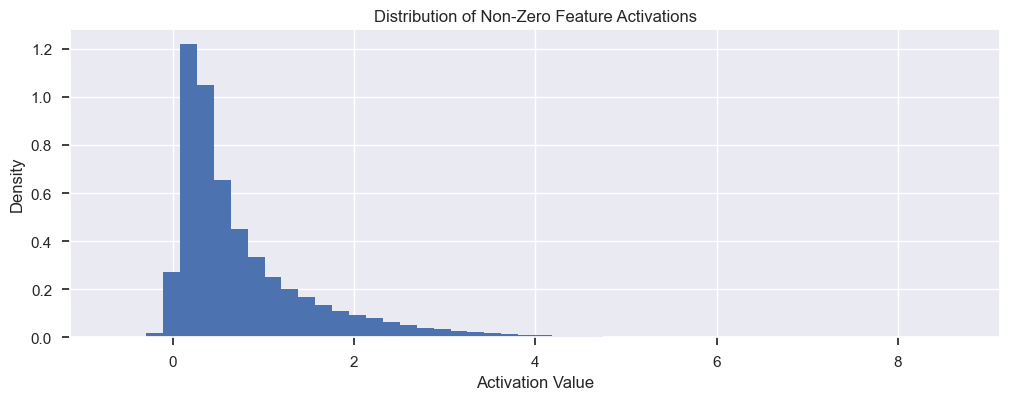

Non-zero activation statistics:
  Mean: 0.771
  Std: 0.803
  Min: -0.669
  Max: 8.662


In [5]:
# Quick visualization of feature activations
plt.figure(figsize=(12, 4))

# Plot distribution of non-zero activations
non_zero_activations = features[features != 0].numpy()
plt.hist(non_zero_activations, bins=50, density=True)
plt.title('Distribution of Non-Zero Feature Activations')
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.show()

# Print some basic stats
print(f"Non-zero activation statistics:")
print(f"  Mean: {non_zero_activations.mean():.3f}")
print(f"  Std: {non_zero_activations.std():.3f}")
print(f"  Min: {non_zero_activations.min():.3f}")
print(f"  Max: {non_zero_activations.max():.3f}")

In [7]:
# Load original data to get input tokens
from src.data_io import load_activation_data

original_data = load_activation_data()
original_activations = original_data["activations"]
metadata = original_data.get("metadata", {})

# Get activations for the first feature (index 0)
feature_idx = 0
feature_activations = features[:, feature_idx]

# Find top 10 activation indices
top_k = 10
top_activations, top_indices = torch.topk(feature_activations, top_k)

print(f"Top {top_k} activations for feature {feature_idx}:")
for i, (activation, idx) in enumerate(zip(top_activations, top_indices)):
    print(f"\nRank {i+1}:")
    print(f"  Activation value: {activation:.3f}")
    print(f"  Sample index: {idx}")
    
    # Get the original input for this sample
    original_input = original_activations[idx]
    
    # Get the top contributing input dimensions
    top_input_k = 5
    top_inputs, top_input_indices = torch.topk(torch.abs(original_input), top_input_k)
    
    print(f"  Top {top_input_k} contributing input dimensions:")
    for input_val, input_idx in zip(top_inputs, top_input_indices):
        print(f"    Dimension {input_idx}: {input_val:.3f}")

# Visualize the activation pattern
plt.figure(figsize=(12, 4))
plt.plot(feature_activations.numpy())
plt.title(f'Activation Pattern for Feature {feature_idx}')
plt.xlabel('Sample Index')
plt.ylabel('Activation Value')
plt.show()

# Show activation distribution for this feature
plt.figure(figsize=(12, 4))
non_zero_feature = feature_activations[feature_activations != 0].numpy()
plt.hist(non_zero_feature, bins=50, density=True)
plt.title(f'Distribution of Non-Zero Activations for Feature {feature_idx}')
plt.xlabel('Activation Value')
plt.ylabel('Density')
plt.show()

ImportError: attempted relative import with no known parent package